<a href="https://colab.research.google.com/github/jtk4545/Inherited-IRA/blob/main/inherited_ira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
''' ********** ASSETS ********** '''
# starting year and the number of future years to forecast
current_year, n_future_years = 2022, 11

# Inherited IRA starting amount, average rate of return, and the number of years left to withdraw
ira_amount, ira_ror, years_remaining = 291000, 0.07, 10

# Example: The new asset is the S&P 500
new_asset, new_asset_ror, new_asset_contribution_rate_perc_of_income = 0, 0.07, 0


''' ********** ASSET INCOME WITHDRAWAL ********** '''
swr = 0.0 # percentage of IRA + New Asset to withdraw and use to live on each year


''' ********** INCOME ********** '''
# starting year income and average raise each year
income, income_yr_increase = 170000, 0.03

# explicitly define future years incomes instead of using percent increase
income_dict = {
    #2023: 280000
}

''' ********** TAXES ********** '''
# Starting year income bracket
standard_deduction = 25900
income_bracket = [
    (0, standard_deduction),
    (0.1, 20550+standard_deduction),
    (0.12, 83550+standard_deduction),
    (0.22, 178150+standard_deduction),
    (0.24, 340100+standard_deduction),
    (0.32, 431900+standard_deduction),
    (0.35, 647850+standard_deduction),
    (0.37, -1)
]

# highest tax willing to pay on IRA withdrawal
# if income is already higher than this number, a minimum amount is calculated
# roughly similar to RMDs
max_acceptable_tax_rate = 0.24

# average yearly increase in tax bracket
tax_bracket_yr_increase = 0.03


In [ ]:
## Define Functions
def determine_withdrawal_amount(swr_amount):
    if ira_amount == 0:
        print('ira is empty')
        return 0

    ramount = min(max(swr_amount, ira_amount/(years_remaining-0)), ira_amount)
    print('Minimum withdrawal amount:', ramount)
    
    for rate, amount in income_bracket:
        if amount > -1 and max_acceptable_tax_rate==rate and income <= amount:
            ramount = max(amount - income, ramount)

    return min(ramount, ira_amount)

def tax_amount(total_income):
    tamount = 0
    prev_amount = 0
    for rate, amount in income_bracket:
        tamount += (min(total_income,amount)-prev_amount)*rate
        #print(f'TAXES: rate={rate}, running_amount={tamount}')
        if total_income<amount:
            break
        
        prev_amount = amount

    return tamount



In [ ]:

x_years = [current_year+i for i in range(n_future_years)]
y_damounts = []
y_new_asset = []
y_taxes = []
y_ira = []
y_swr = []
y_income = []

for i in range(n_future_years):
    print(f'YEAR: {current_year+i}')
    print(current_year+i, 'Starting IRA Balance:', ira_amount)
    print(current_year+i, 'Starting New asset balance:', new_asset)
    swr_amount = (ira_amount+new_asset)*swr
    y_swr.append(swr_amount)
    damount = determine_withdrawal_amount(swr_amount)
    y_damounts.append(damount)

    print(current_year+i, f'Safe withdrawal amount (SWR): ${swr_amount}')
    print(current_year+i, f'Total withdrawal amount: ${damount}')

    if swr_amount > damount:
        new_asset -= (swr_amount-damount)
        wamount = swr_amount

    taxes = tax_amount(damount+income)
    inc_taxes = tax_amount(income)
    taxes -= inc_taxes
    y_taxes.append(taxes)
    print(current_year+i, f'Withdrawal taxes: {taxes}')
    y_ira.append(ira_amount)
    ira_amount -= damount
    new_asset += max((damount-swr_amount-taxes), 0)
    
    y_new_asset.append(new_asset)

    print(current_year+i, 'Ending IRA Balance:', ira_amount)
    print(current_year+i, 'Ending New asset balance:', new_asset)
    print()
    print()
    # increment/decrement
    years_remaining -= 1
    ira_amount *= (1+ira_ror)
    new_asset *= (1+new_asset_ror)
    new_asset += income*new_asset_contribution_rate_perc_of_income
    y_income.append(income)
    income = income_dict.get(current_year+i+1, income*(1+income_yr_increase))
    income_bracket = [(rate, amount*(1+tax_bracket_yr_increase)) for rate, amount in income_bracket]



YEAR: 2022
2022 Starting IRA Balance: 291000
2022 Starting New asset balance: 0
Minimum withdrawal amount: 29100.0
2022 Safe withdrawal amount (SWR): $0.0
2022 Total withdrawal amount: $196000
2022 Withdrawal taxes: 46359.0
2022 Ending IRA Balance: 95000
2022 Ending New asset balance: 149641.0


YEAR: 2023
2023 Starting IRA Balance: 101650.0
2023 Starting New asset balance: 160115.87
Minimum withdrawal amount: 11294.444444444445
2023 Safe withdrawal amount (SWR): $0.0
2023 Total withdrawal amount: $101650.0
2023 Withdrawal taxes: 23694.569999999996
2023 Ending IRA Balance: 0.0
2023 Ending New asset balance: 238071.3


YEAR: 2024
2024 Starting IRA Balance: 0.0
2024 Starting New asset balance: 254736.291
ira is empty
2024 Safe withdrawal amount (SWR): $0.0
2024 Total withdrawal amount: $0
2024 Withdrawal taxes: 0.0
2024 Ending IRA Balance: 0.0
2024 Ending New asset balance: 254736.291


YEAR: 2025
2025 Starting IRA Balance: 0.0
2025 Starting New asset balance: 272567.83137
ira is empty
2

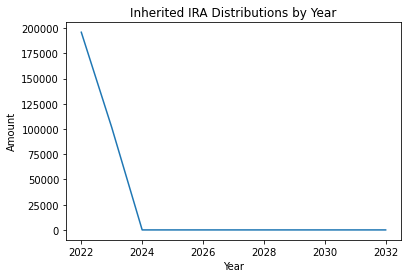

Total withdrawn from IRA: $297650.0


In [ ]:
import matplotlib.pyplot as plt


plt.plot(x_years, y_damounts)
plt.title('Inherited IRA Distributions by Year')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.show()

print(f'Total withdrawn from IRA: ${round(sum(y_damounts), 2)}')


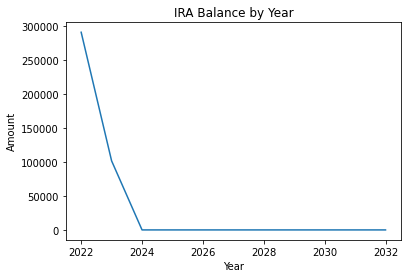

In [ ]:
plt.plot(x_years, y_ira)
plt.title('IRA Balance by Year')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.show()

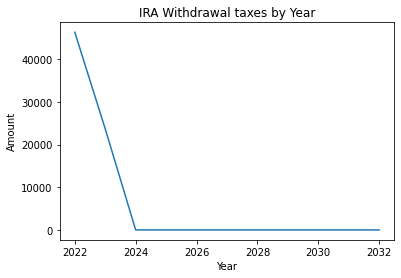

Total taxes: $70053.57


In [ ]:
plt.plot(x_years, y_taxes)
plt.title('IRA Withdrawal taxes by Year')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.show()
print(f'Total taxes: ${round(sum(y_taxes),2)}')

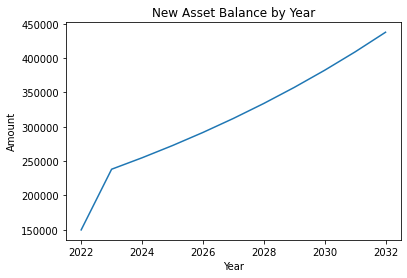

In [ ]:
plt.plot(x_years, y_new_asset)
plt.title('New Asset Balance by Year')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.show()

In [ ]:
print(f'Effective tax rate for all IRA withdrawals: {round(100*sum(y_taxes)/sum(y_damounts),4)}%')

Effective tax rate for all IRA withdrawals: 23.5356%


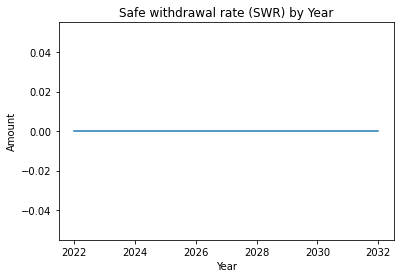

In [ ]:
plt.plot(x_years, y_swr)
plt.title('Safe withdrawal rate (SWR) by Year')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.show()

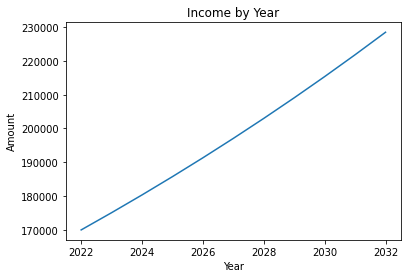

In [ ]:
plt.plot(x_years, y_income)
plt.title('Income by Year')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.show()